In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('SAM.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/22/2015,222.850006,223.100006,220.919998,221.660004,221.660004,147800.0
1,7/23/2015,221.389999,225.000000,221.220001,222.960007,222.960007,225900.0
2,7/24/2015,224.070007,226.250000,223.190002,224.149994,224.149994,169000.0
3,7/27/2015,221.199997,222.639999,217.869995,218.210007,218.210007,221300.0
4,7/28/2015,218.630005,219.059998,214.210007,218.199997,218.199997,196800.0


In [3]:
data1 = data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
data1.head()

,Date,Close
0,7/22/2015,221.660004
1,7/23/2015,222.960007
2,7/24/2015,224.149994
3,7/27/2015,218.210007
4,7/28/2015,218.199997


Text(0.5, 1.0, 'SAM (Boston Beer Company) Stock History')

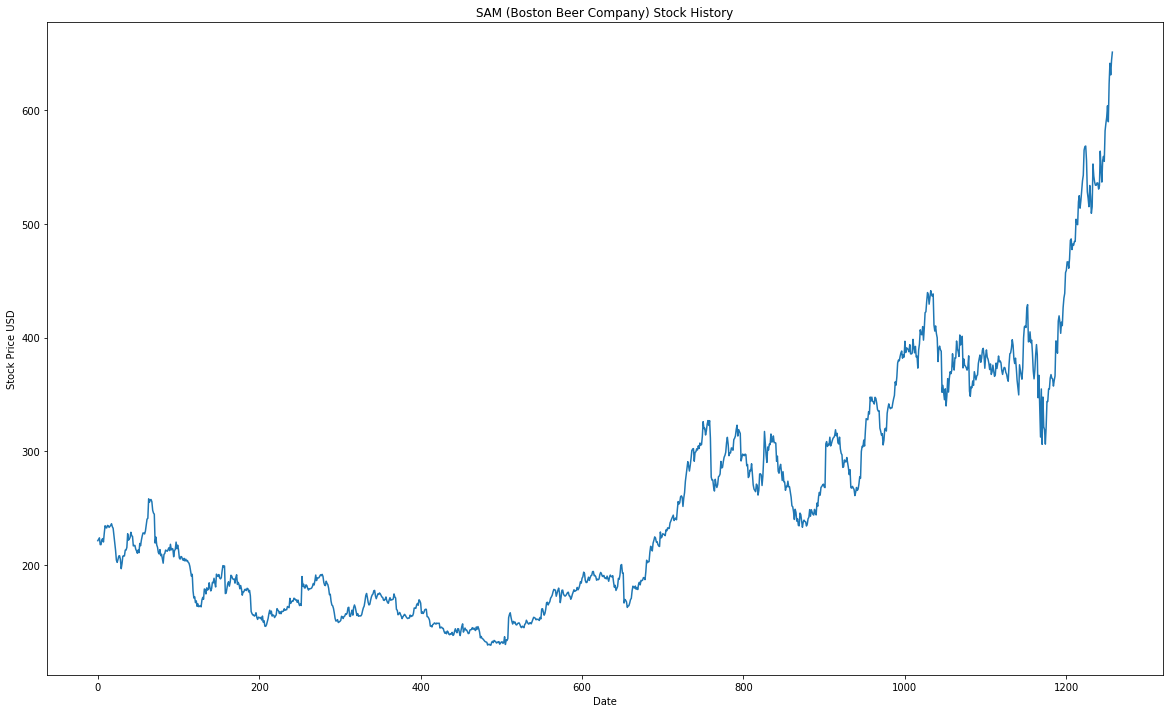

In [4]:
data1["Date"]=pd.to_datetime(data1.Date,format="%m/%d/%Y")
plt.figure(figsize=(20,12))
plt.plot(data1["Close"])
plt.ylabel('Stock Price USD')
plt.xlabel('Date')
plt.title('SAM (Boston Beer Company) Stock History')

In [5]:
model_df = data1.iloc[0:619,:]
model_df.head()

,Date,Close
0,2015-07-22,221.660004
1,2015-07-23,222.960007
2,2015-07-24,224.149994
3,2015-07-27,218.210007
4,2015-07-28,218.199997


In [6]:
from sklearn.model_selection import train_test_split

x = 365
input_data = []
output_data = []

for i in range(x,len(model_df)):
    input_data.append(model_df.loc[i-x:i,"Close"])
    output_data.append(model_df.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [8]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [9]:
#Added LSTM layer along with dropout layers to prevent overfitting. Add Dense layer to specify a one unit output. Compile the model using the adam optomizer and set the loss as the mean_squared_error.
model=Sequential()
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled,y_train_scaled,epochs=10,batch_size=65,verbose=2)

Train on 190 samples
Epoch 1/10
190/190 - 4s - loss: 0.1402
Epoch 2/10
190/190 - 1s - loss: 0.0330
Epoch 3/10
190/190 - 1s - loss: 0.0347
Epoch 4/10
190/190 - 1s - loss: 0.0207
Epoch 5/10
190/190 - 1s - loss: 0.0139
Epoch 6/10
190/190 - 1s - loss: 0.0184
Epoch 7/10
190/190 - 1s - loss: 0.0161
Epoch 8/10
190/190 - 1s - loss: 0.0113
Epoch 9/10
190/190 - 1s - loss: 0.0105
Epoch 10/10
190/190 - 1s - loss: 0.0111


In [10]:
# Reshape testing data to fit new model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [11]:
# Evaluate the model
model_loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

64/1 - 1s - loss: 0.0084
Loss: 0.008515527471899986


In [12]:
# Predict y values for test data, then see how closely they match actuals
predicted_closing_price=model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[158.63847],
       [172.97055],
       [144.7037 ],
       [174.81146],
       [142.23062],
       [155.769  ],
       [170.5357 ],
       [151.44508],
       [170.3944 ],
       [160.39946],
       [154.42085],
       [177.74835],
       [177.81981],
       [177.76302],
       [136.4192 ],
       [148.72348],
       [166.55989],
       [164.11198],
       [146.33778],
       [159.16614],
       [179.9663 ],
       [161.27698],
       [139.92542],
       [148.67464],
       [162.78264],
       [137.60355],
       [190.83328],
       [187.11511],
       [169.38164],
       [151.27519],
       [155.32596],
       [146.29344],
       [143.61475],
       [176.96884],
       [177.55055],
       [158.97794],
       [145.20494],
       [161.92278],
       [145.41406],
       [136.38222],
       [163.22159],
       [153.05005],
       [183.35869],
       [154.68509],
       [163.91205],
       [149.93306],
       [163.3287 ],
       [149.29625],
       [175.71162],
       [169.17198],


In [13]:
predicted_stock_price = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [14]:
new_data = pd.DataFrame({"Predicted": predicted_stock_price})
new_data

,Predicted
0,158.638474
1,172.970551
2,144.703705
3,174.811462
4,142.230621
...,...
59,152.949478
60,146.553543
61,152.037918
62,189.013214


In [15]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[161.5     ],
       [160.600006],
       [141.850006],
       [178.      ],
       [132.399994],
       [161.649994],
       [178.600006],
       [150.5     ],
       [158.600006],
       [165.199997],
       [152.449997],
       [173.      ],
       [178.050003],
       [174.75    ],
       [132.800003],
       [142.300003],
       [173.75    ],
       [156.949997],
       [143.149994],
       [155.699997],
       [185.649994],
       [153.25    ],
       [130.699997],
       [150.149994],
       [169.75    ],
       [133.300003],
       [191.100006],
       [187.449997],
       [156.949997],
       [148.25    ],
       [153.      ],
       [143.449997],
       [150.949997],
       [172.      ],
       [170.199997],
       [155.600006],
       [146.350006],
       [153.850006],
       [138.449997],
       [131.449997],
       [168.      ],
       [154.100006],
       [194.      ],
       [152.600006],
       [153.600006],
       [141.399994],
       [156.149994],
       [139.8

In [16]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
new_data["Actual"] = actuals
new_data

,Predicted,Actual
0,158.638474,161.500000
1,172.970551,160.600006
2,144.703705,141.850006
3,174.811462,178.000000
4,142.230621,132.399994
...,...,...
59,152.949478,145.449997
60,146.553543,144.850006
61,152.037918,148.600006
62,189.013214,191.300003


In [17]:
inputs = []

for i in range(619,len(data1)):
    inputs.append(data1.loc[i-x:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[191.274  ],
       [191.22412],
       [191.12926],
       [191.11885],
       [191.21857],
       [191.35992],
       [191.4638 ],
       [191.53671],
       [191.61713],
       [191.62608],
       [191.59521],
       [191.50885],
       [191.46095],
       [191.3684 ],
       [191.18056],
       [191.04344],
       [190.9922 ],
       [190.96794],
       [190.95341],
       [190.97818],
       [190.86064],
       [190.52364],
       [190.10315],
       [189.47792],
       [188.79886],
       [188.14772],
       [187.74776],
       [187.49701],
       [187.49768],
       [187.92899],
       [188.6477 ],
       [189.33014],
       [189.99495],
       [189.79799],
       [189.1648 ],
       [188.18079],
       [186.93729],
       [185.3626 ],
       [183.65546],
       [181.90334],
       [180.25009],
       [178.80998],
       [177.61331],
       [176.83234],
       [176.52202],
       [176.51817],
       [176.736  ],
       [177.14937],
       [177.61703],
       [178.14827],


In [20]:
forecast = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecasted_stock = data1.iloc[619:,:]
forecasted_stock

,Date,Close
619,2018-01-04,187.899994
620,2018-01-05,187.350006
621,2018-01-08,188.000000
622,2018-01-09,191.800003
623,2018-01-10,193.750000
...,...,...
1254,2020-07-15,641.000000
1255,2020-07-16,630.780029
1256,2020-07-17,643.580017
1257,2020-07-20,650.789978


In [22]:
forecasted_stock["Prediction"] = forecast
forecasted_stock

C:\Users\Joymode\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
619,2018-01-04,187.899994,191.274002
620,2018-01-05,187.350006,191.224121
621,2018-01-08,188.000000,191.129257
622,2018-01-09,191.800003,191.118851
623,2018-01-10,193.750000,191.218567
...,...,...,...
1254,2020-07-15,641.000000,286.410950
1255,2020-07-16,630.780029,286.500519
1256,2020-07-17,643.580017,286.589447
1257,2020-07-20,650.789978,286.670502


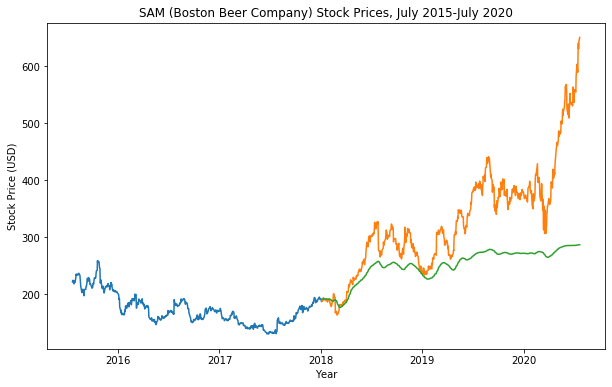

In [23]:
model_df = model_df.set_index("Date")
forecasted_stock = forecasted_stock.set_index("Date")
plt.figure(figsize=(10,6))
plt.plot(model_df["Close"])
plt.plot(forecasted_stock[['Close',"Prediction"]])
plt.title("SAM (Boston Beer Company) Stock Prices, July 2015-July 2020")
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.savefig('SAM_Prediction.png')